In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

In [3]:
# 1. LOAD DATA
df = pd.read_csv('ObesityDataSet.csv')

In [4]:
# 2. TAMPILKAN BEBERAPA BARIS PERTAMA DAN INFORMASI UMUM DATASET
print("="*50)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*50)

EXPLORATORY DATA ANALYSIS (EDA)


In [5]:
# Menampilkan 5 baris pertama
print("\n2.1 DATA PREVIEW (5 BARIS PERTAMA):")
print(df.head())


2.1 DATA PREVIEW (5 BARIS PERTAMA):
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1    

In [6]:
# Informasi umum dataset
print("\n2.2 INFORMASI UMUM DATASET:")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"Nama kolom: {', '.join(df.columns)}")


2.2 INFORMASI UMUM DATASET:
Jumlah baris: 2111
Jumlah kolom: 17
Nama kolom: Age, Gender, Height, Weight, CALC, FAVC, FCVC, NCP, SCC, SMOKE, CH2O, family_history_with_overweight, FAF, TUE, CAEC, MTRANS, NObeyesdad


In [7]:
# Deskripsi dan tipe data
print("\n2.3 TIPE DATA:")
print(df.dtypes)


2.3 TIPE DATA:
Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


In [8]:
print("\n2.4 DESKRIPSI STATISTIK DATA NUMERIK:")
print(df.describe())


2.4 DESKRIPSI STATISTIK DATA NUMERIK:
         Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     15

In [9]:
# Untuk kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\n2.5 DESKRIPSI DATA KATEGORIKAL:")
    for col in categorical_cols:
        print(f"\nKolom: {col}")
        print(df[col].value_counts())
        print(f"Jumlah nilai unik: {df[col].nunique()}")


2.5 DESKRIPSI DATA KATEGORIKAL:

Kolom: Age
Age
18           124
26            99
21            96
23            89
19            59
            ... 
21.680123      1
24.469756      1
25.12791       1
25.986368      1
21.772251      1
Name: count, Length: 1394, dtype: int64
Jumlah nilai unik: 1394

Kolom: Gender
Gender
Male      1056
Female    1033
?           13
Name: count, dtype: int64
Jumlah nilai unik: 3

Kolom: Height
Height
1.7         58
1.65        50
1.6         41
1.75        39
1.62        36
            ..
1.643421     1
1.640535     1
1.626483     1
1.64599      1
1.803677     1
Name: count, Length: 1562, dtype: int64
Jumlah nilai unik: 1562

Kolom: Weight
Weight
80            58
50            42
70            41
75            39
60            36
              ..
111.939983     1
111.555967     1
111.357062     1
111.922491     1
133.472641     1
Name: count, Length: 1518, dtype: int64
Jumlah nilai unik: 1518

Kolom: CALC
CALC
Sometimes     1386
no             634
Freque

In [10]:
# 3. VISUALISASI DATA
print("="*50)
print("VISUALISASI DATA")
print("="*50)

VISUALISASI DATA


In [11]:
# Pengaturan untuk tampilan grafik
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)


3.2 DISTRIBUSI VARIABEL KATEGORIKAL


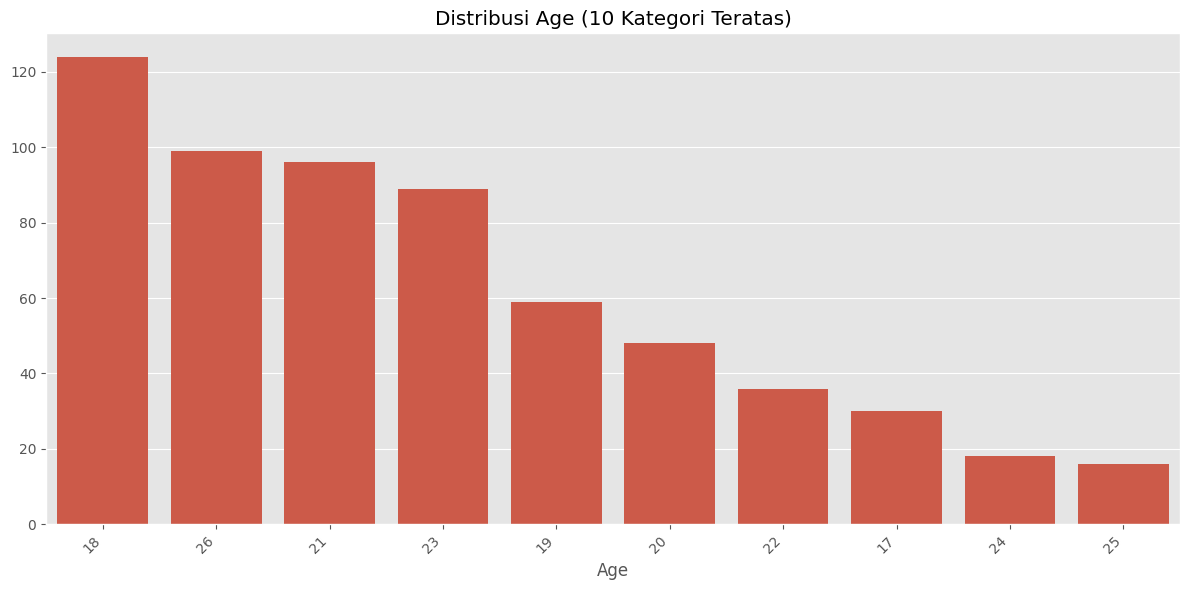

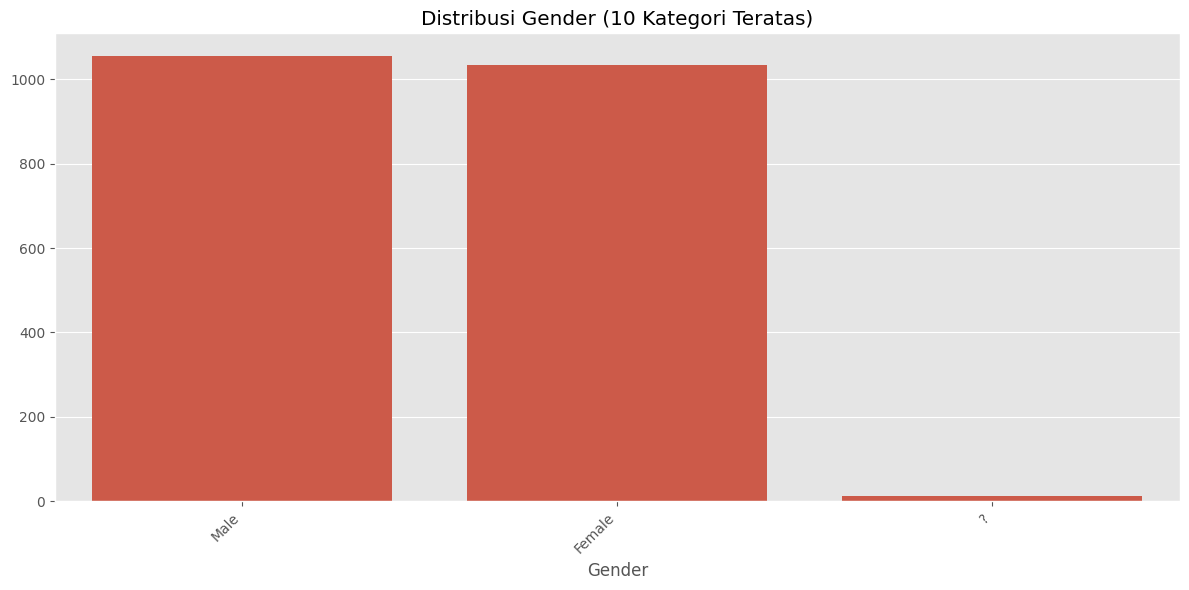

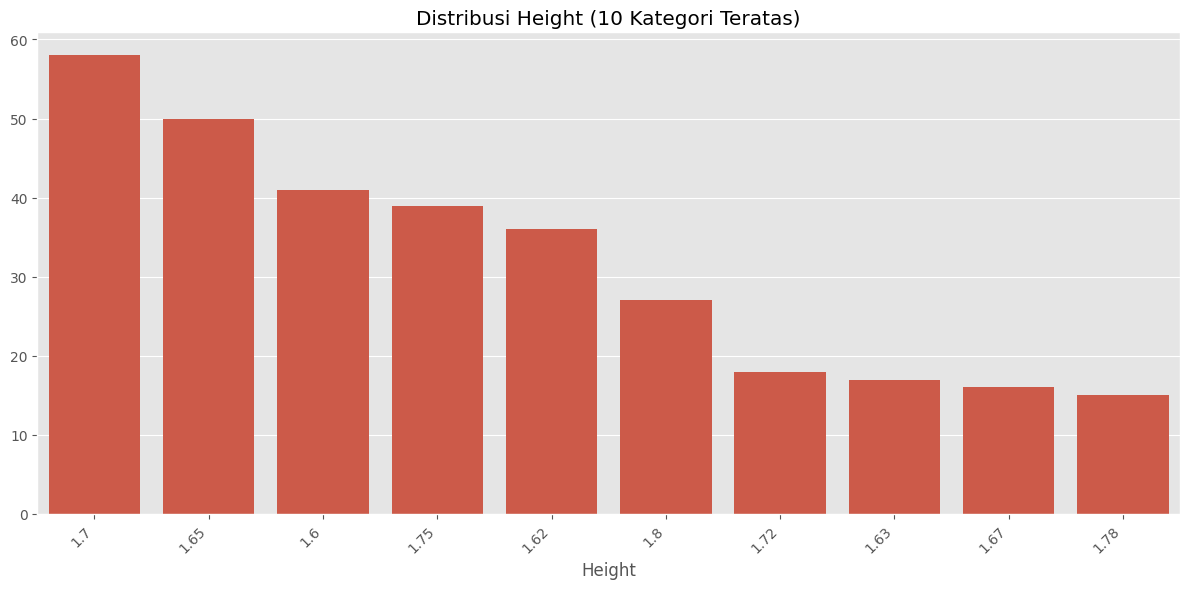

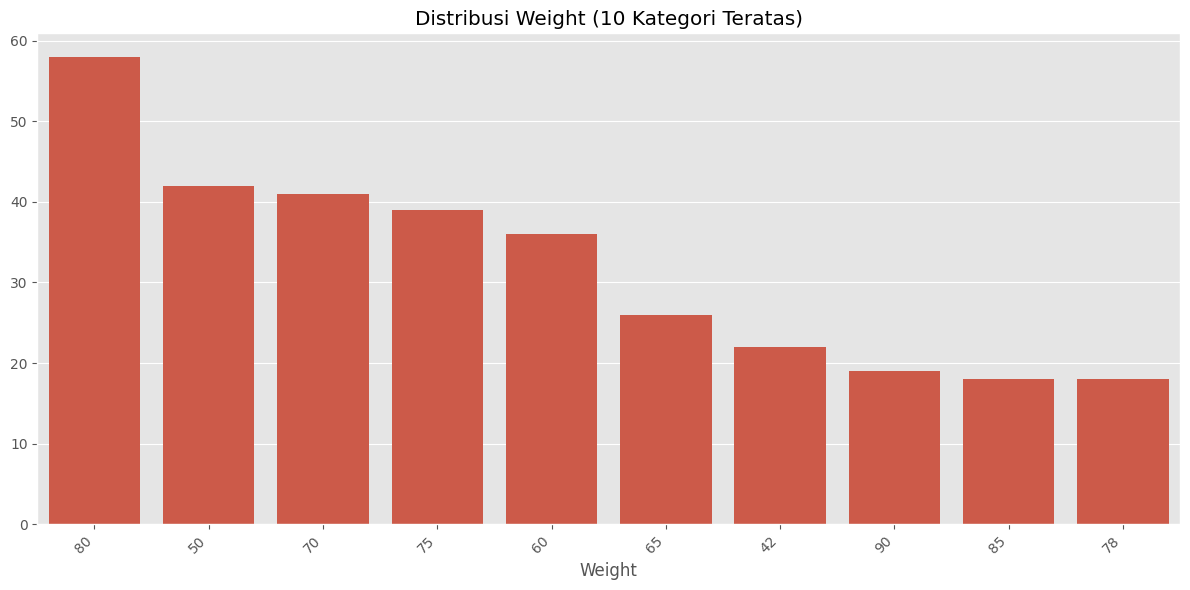

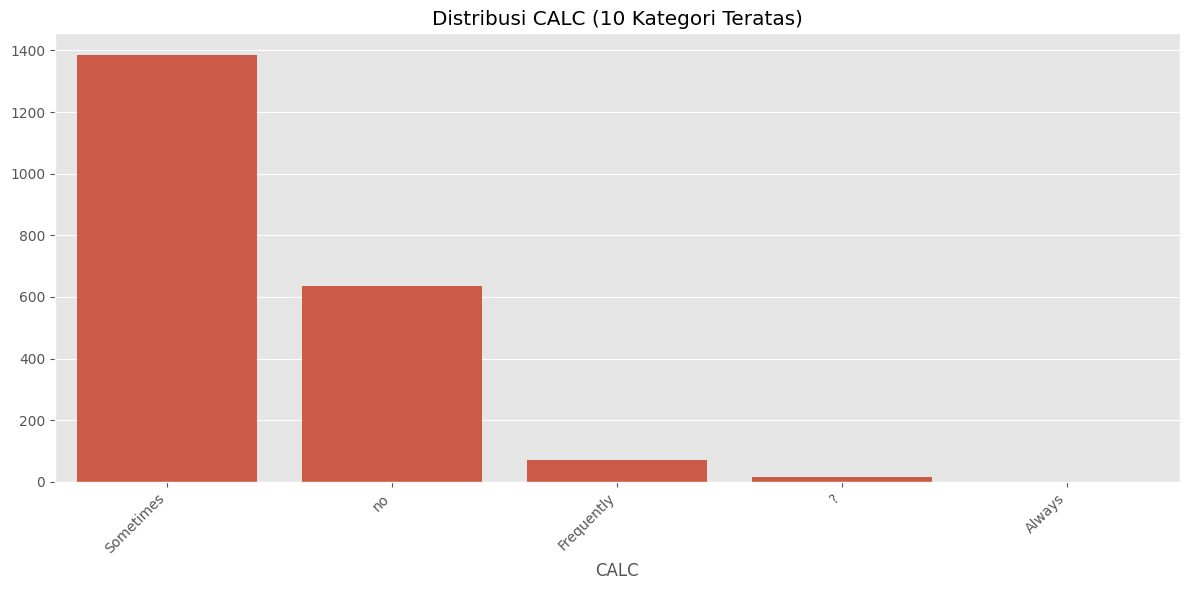

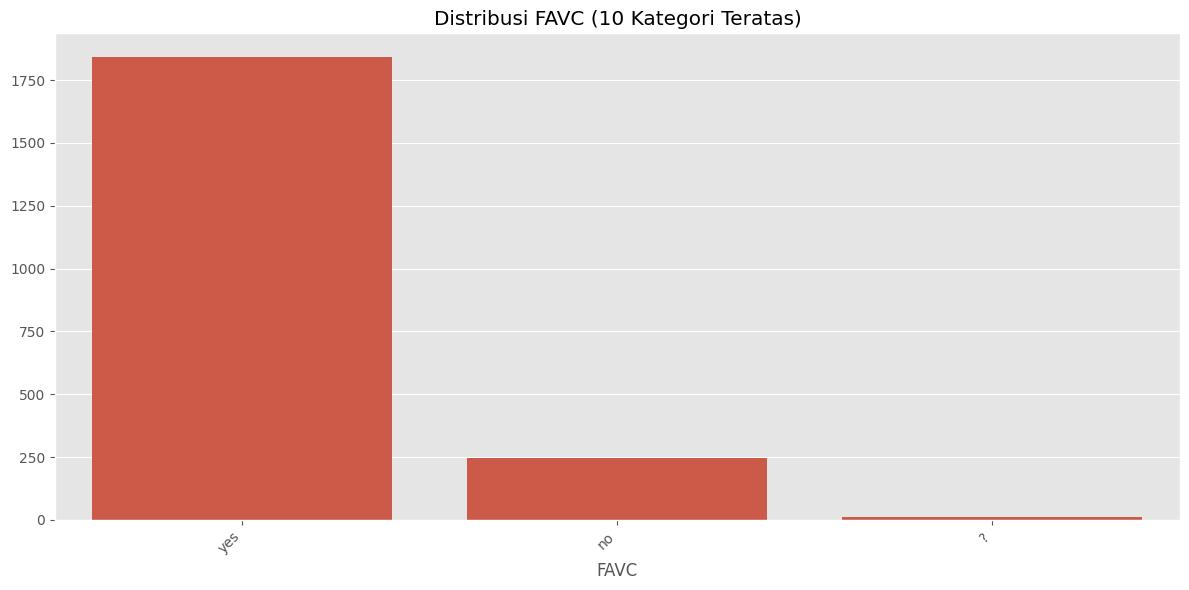

In [12]:
# 3.1 Distribusi variabel kategorikal
if len(categorical_cols) > 0:
    print("\n3.2 DISTRIBUSI VARIABEL KATEGORIKAL")

    # Hanya tampilkan 6 variabel kategorikal pertama (jika ada)
    for i, col in enumerate(categorical_cols[:min(6, len(categorical_cols))]):
        plt.figure(figsize=(12, 6))
        top_categories = df[col].value_counts().head(10)  # Ambil 10 kategori teratas
        sns.barplot(x=top_categories.index, y=top_categories.values)
        plt.title(f'Distribusi {col} (10 Kategori Teratas)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        file_path = os.path.join('Assets/distribusi_kategorikal', f'distribusi_{col}.png')
        plt.savefig(file_path)
        plt.show()

In [13]:
# 4. CEK MISSING VALUES, UNIQUE VALUES, DATA DUPLIKAT, DAN OUTLIERS
print("="*50)
print("CEK KUALITAS DATA")
print("="*50)

CEK KUALITAS DATA


In [14]:
# 4.1 Missing Values
print("\n4.1 MISSING VALUES:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values,
                             'Percentage (%)': missing_percent})
print(missing_data[missing_data['Missing Values'] > 0])


4.1 MISSING VALUES:
                                Missing Values  Percentage (%)
Age                                         14        0.663193
Gender                                       9        0.426338
Height                                      12        0.568451
Weight                                      11        0.521080
CALC                                         5        0.236855
FAVC                                        11        0.521080
FCVC                                         8        0.378967
NCP                                         12        0.568451
SCC                                         10        0.473709
SMOKE                                        5        0.236855
CH2O                                         6        0.284225
family_history_with_overweight              13        0.615822
FAF                                          8        0.378967
TUE                                          9        0.426338
CAEC                              

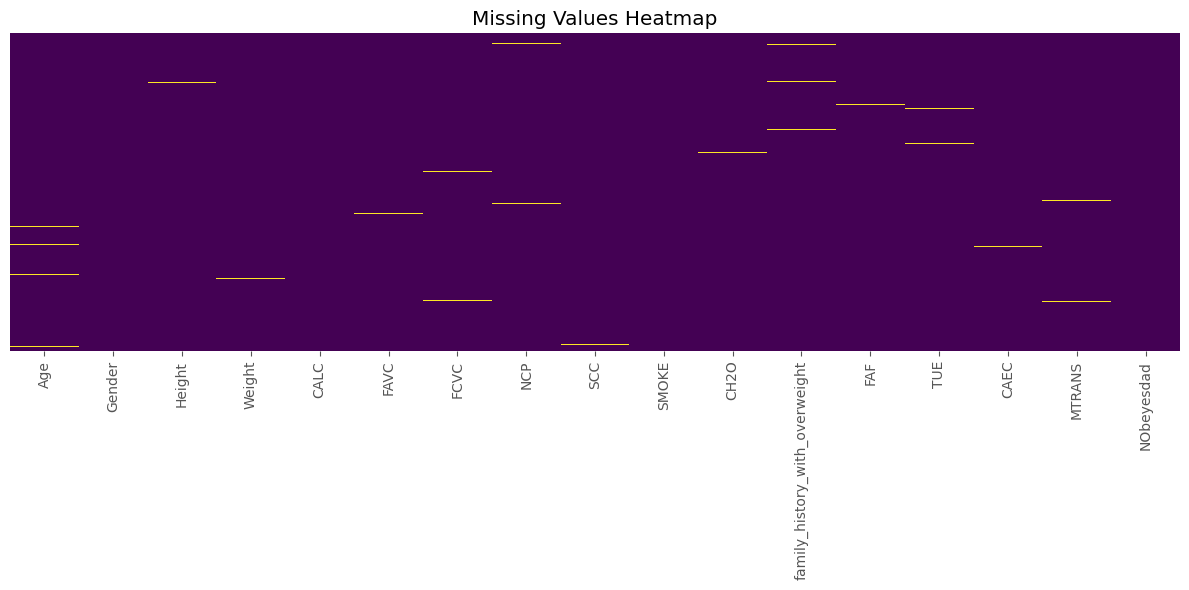

In [15]:
# Visualisasi missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.tight_layout()
file_path = os.path.join('Assets/missing_values', 'missing_values.png')
plt.savefig(file_path)
plt.show()

In [16]:
# 4.2 Unique Values
print("\n4.2 UNIQUE VALUES:")
unique_values = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Unique Values': [df[col].nunique() for col in df.columns],
    'Unique Ratio (%)': [(df[col].nunique() / len(df)) * 100 for col in df.columns]
})
print(unique_values)


4.2 UNIQUE VALUES:
                                                        Column Data Type  \
Age                                                        Age    object   
Gender                                                  Gender    object   
Height                                                  Height    object   
Weight                                                  Weight    object   
CALC                                                      CALC    object   
FAVC                                                      FAVC    object   
FCVC                                                      FCVC    object   
NCP                                                        NCP    object   
SCC                                                        SCC    object   
SMOKE                                                    SMOKE    object   
CH2O                                                      CH2O    object   
family_history_with_overweight  family_history_with_overweight    ob

In [17]:
# 4.3 Data Duplikat
print("\n4.3 DATA DUPLIKAT:")
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates} ({(duplicates/len(df))*100:.2f}%)")


4.3 DATA DUPLIKAT:
Jumlah baris duplikat: 18 (0.85%)



4.4 KESEIMBANGAN DATA KATEGORIKAL:

Distribusi untuk Gender:
  Male: 1056 (50.02%)
  Female: 1033 (48.93%)
  ?: 13 (0.62%)


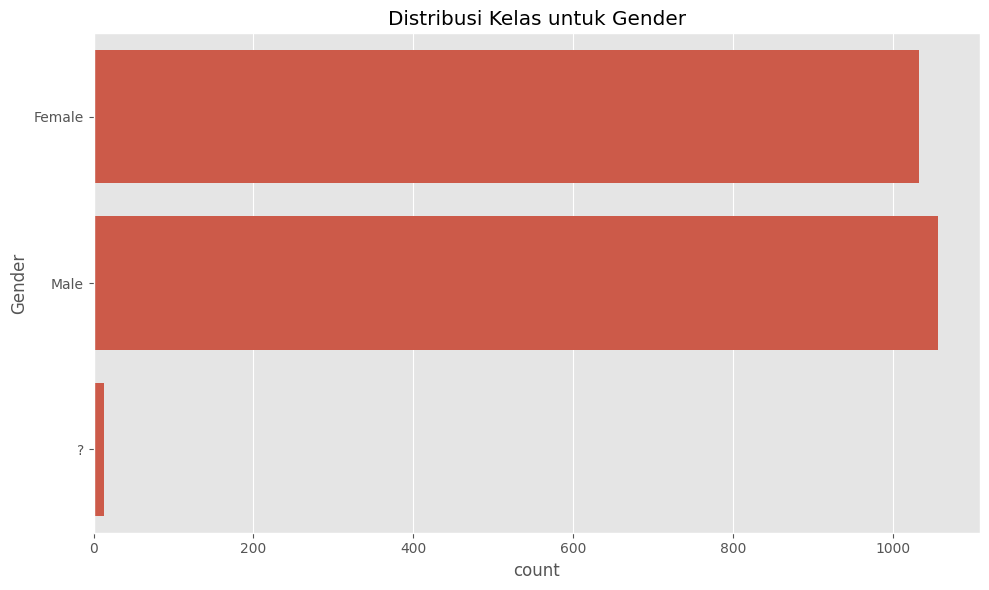


Distribusi untuk CALC:
  Sometimes: 1386 (65.66%)
  no: 634 (30.03%)
  Frequently: 70 (3.32%)
  ?: 15 (0.71%)
  Always: 1 (0.05%)


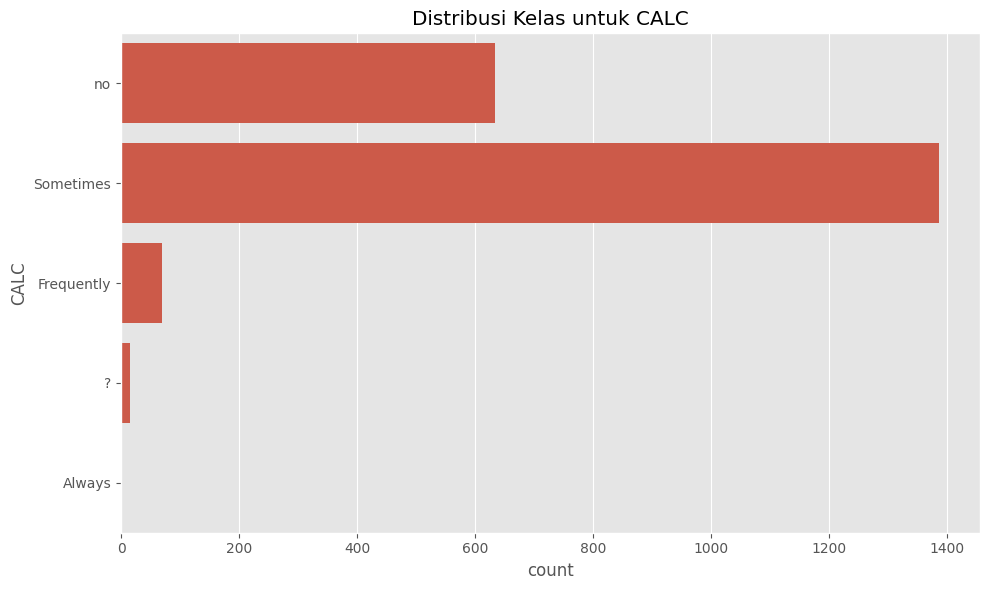


Distribusi untuk FAVC:
  yes: 1844 (87.35%)
  no: 245 (11.61%)
  ?: 11 (0.52%)


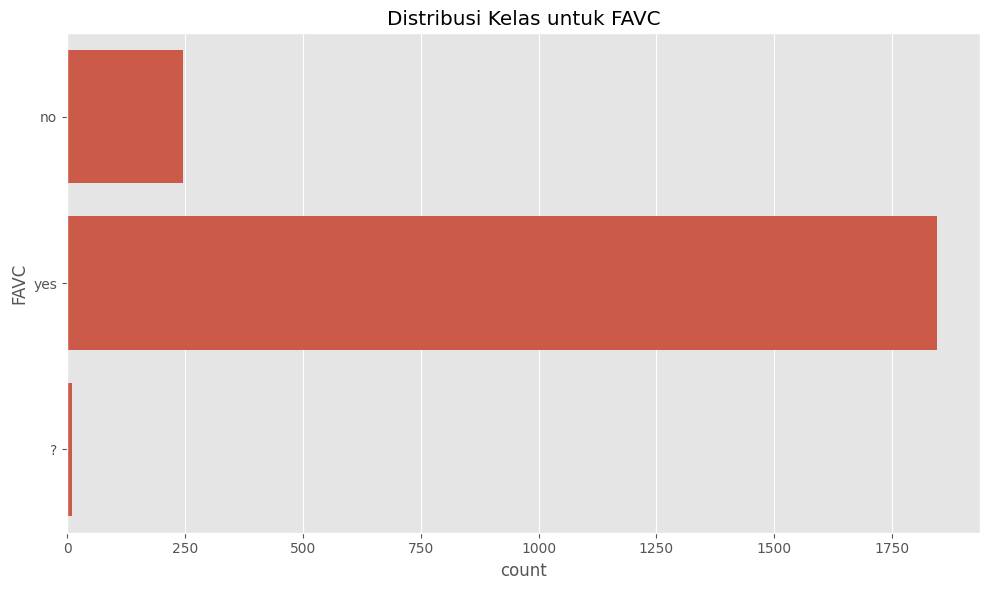


Distribusi untuk SCC:
  no: 1997 (94.60%)
  yes: 96 (4.55%)
  ?: 8 (0.38%)


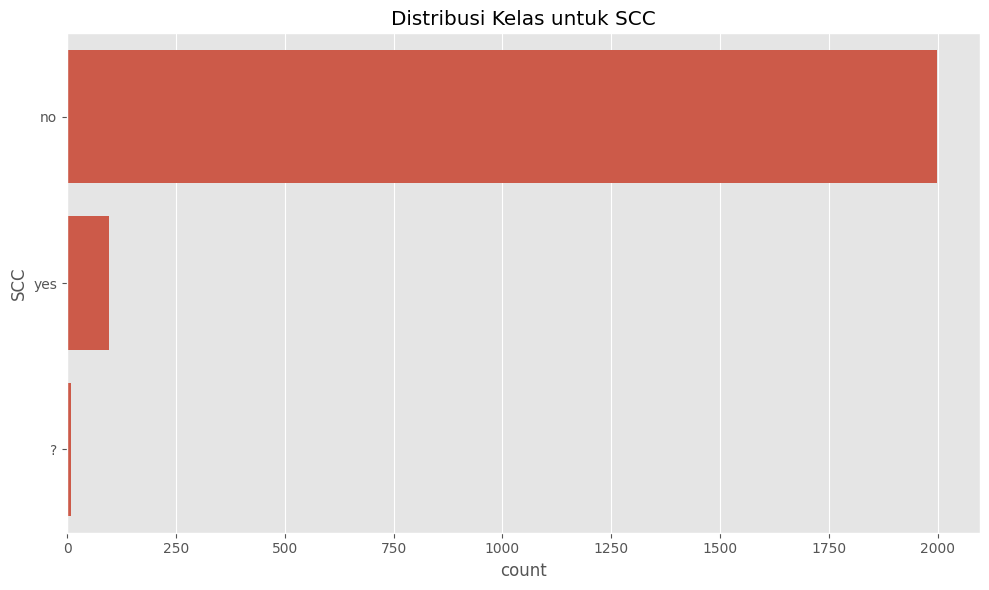


Distribusi untuk SMOKE:
  no: 2054 (97.30%)
  yes: 44 (2.08%)
  ?: 8 (0.38%)


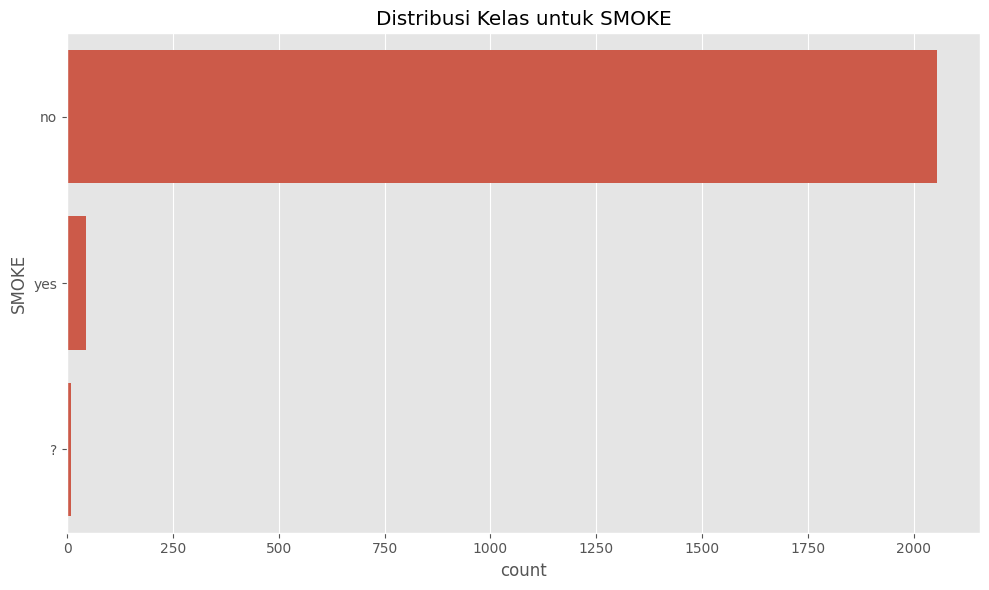


Distribusi untuk family_history_with_overweight:
  yes: 1705 (80.77%)
  no: 383 (18.14%)
  ?: 10 (0.47%)


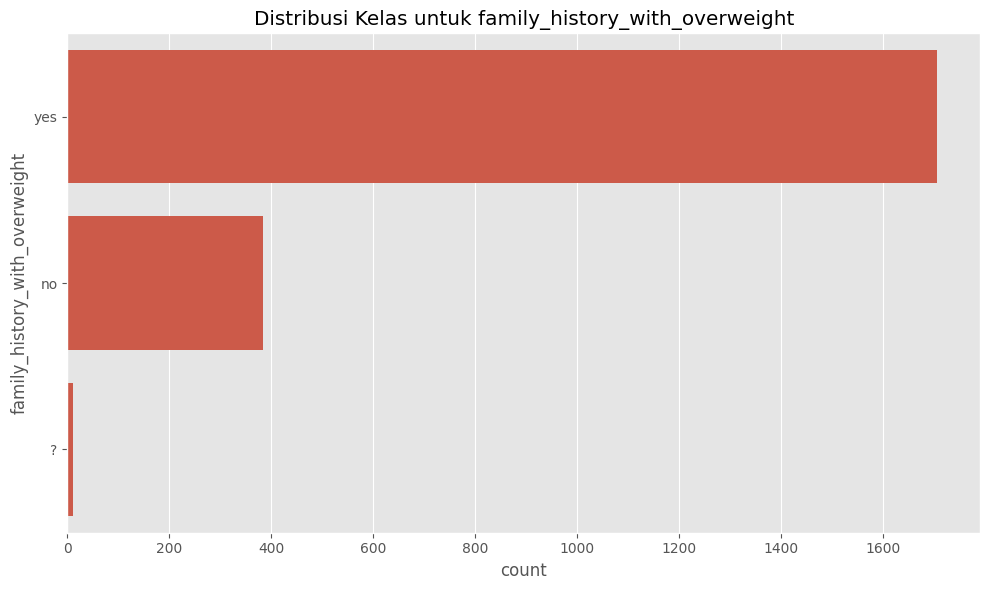


Distribusi untuk CAEC:
  Sometimes: 1747 (82.76%)
  Frequently: 242 (11.46%)
  Always: 53 (2.51%)
  no: 51 (2.42%)
  ?: 7 (0.33%)


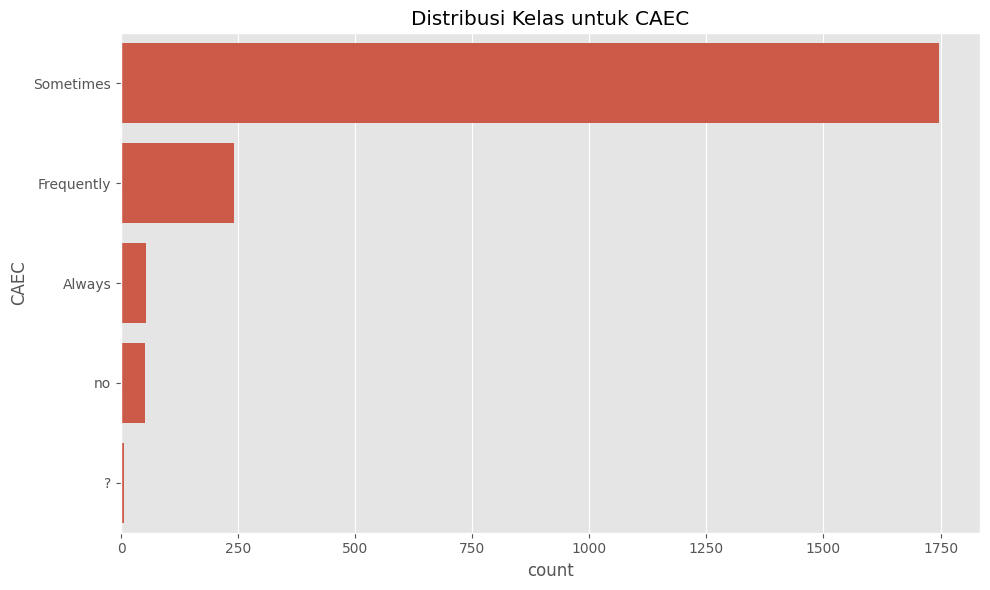


Distribusi untuk MTRANS:
  Public_Transportation: 1572 (74.47%)
  Automobile: 453 (21.46%)
  Walking: 56 (2.65%)
  Motorbike: 11 (0.52%)
  Bike: 7 (0.33%)
  ?: 6 (0.28%)


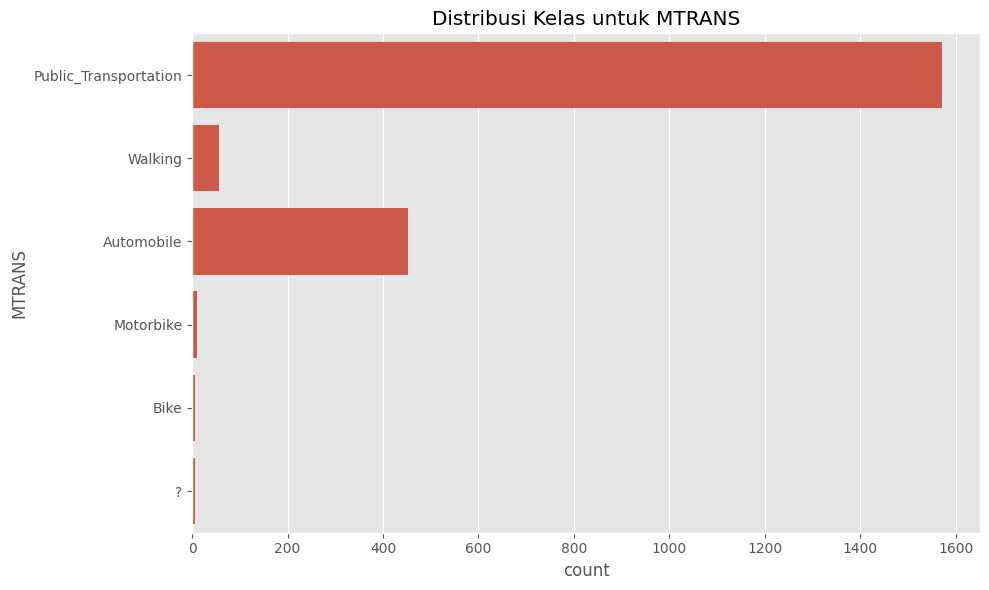


Distribusi untuk NObeyesdad:
  Obesity_Type_I: 351 (16.63%)
  Obesity_Type_III: 324 (15.35%)
  Obesity_Type_II: 297 (14.07%)
  Overweight_Level_I: 290 (13.74%)
  Overweight_Level_II: 290 (13.74%)
  Normal_Weight: 287 (13.60%)
  Insufficient_Weight: 272 (12.88%)


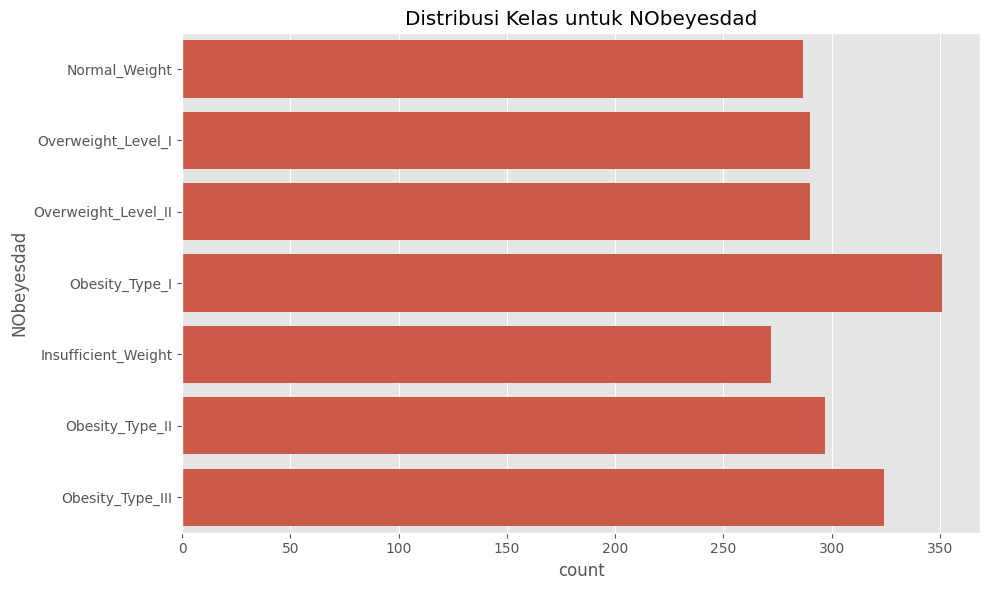

In [18]:
# 4.4 Keseimbangan Data (untuk data kategorikal yang bisa menjadi target)
if len(categorical_cols) > 0:
    print("\n4.4 KESEIMBANGAN DATA KATEGORIKAL:")
    for col in categorical_cols:
        if df[col].nunique() < 10:  # Hanya tampilkan jika jumlah kelas < 10
            class_counts = df[col].value_counts()
            class_percents = (class_counts / len(df)) * 100

            print(f"\nDistribusi untuk {col}:")
            for cls, count in class_counts.items():
                print(f"  {cls}: {count} ({class_percents[cls]:.2f}%)")

            # Visualisasi keseimbangan
            plt.figure(figsize=(10, 6))
            sns.countplot(y=df[col])
            plt.title(f'Distribusi Kelas untuk {col}')
            plt.tight_layout()
            file_path = os.path.join('Assets/class_balance', f'class_balance_{col}.png')
            plt.savefig(file_path)
            plt.show()

In [19]:
# 4.5 DETEKSI OUTLIER
print("\n4.5 DETEKSI OUTLIER (MENGGUNAKAN METODE IQR):")


4.5 DETEKSI OUTLIER (MENGGUNAKAN METODE IQR):


In [20]:
# Ganti '?' dengan NaN
df = df.replace('?', np.nan)

In [21]:
# Konversi kolom numerik ke float64
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [22]:
# Inisialisasi dictionary untuk menyimpan informasi outlier
outlier_summary = {}

In [23]:
# Loop untuk setiap kolom numerik
for col in numeric_cols:
    if df[col].isna().all():
        print(f"Kolom {col}: Tidak dapat menghitung outlier (semua data NaN)")
        continue
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_summary[col] = outlier_count

In [24]:
# Ringkasan outlier
print("\nRingkasan Outlier:")
if all(count == 0 for count in outlier_summary.values()):
    print("  Tidak ada outlier yang ditemukan di semua kolom numerik.")
else:
    for col, count in outlier_summary.items():
        if count > 0:
            print(f"  {col}: {count} outlier ditemukan")


Ringkasan Outlier:
  Age: 179 outlier ditemukan
  Height: 10 outlier ditemukan
  Weight: 15 outlier ditemukan
  FCVC: 8 outlier ditemukan
  NCP: 592 outlier ditemukan
  CH2O: 8 outlier ditemukan
  FAF: 13 outlier ditemukan
  TUE: 7 outlier ditemukan


In [25]:
# 5. KESIMPULAN
print("="*50)
print("KESIMPULAN EDA")
print("="*50)
print("\nBerikut kesimpulan dari proses EDA:")
print("1. Dataset memiliki {} baris dan {} kolom.".format(df.shape[0], df.shape[1]))

KESIMPULAN EDA

Berikut kesimpulan dari proses EDA:
1. Dataset memiliki 2111 baris dan 17 kolom.


In [26]:
# Missing values
if missing_values.sum() > 0:
    print("2. Terdapat {} missing values pada {} kolom.".format(
        missing_values.sum(), len(missing_data[missing_data['Missing Values'] > 0])))
else:
    print("2. Tidak terdapat missing values pada dataset.")

2. Terdapat 150 missing values pada 16 kolom.


In [27]:
# Duplicates
if duplicates > 0:
    print("3. Terdapat {} baris duplikat ({:.2f}%).".format(duplicates, (duplicates/len(df))*100))
else:
    print("3. Tidak terdapat data duplikat pada dataset.")

3. Terdapat 18 baris duplikat (0.85%).


In [28]:
# Outliers
outlier_cols = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
    if len(outliers) > 0:
        outlier_cols.append(col)

In [29]:
if len(outlier_cols) > 0:
    print("4. Terdeteksi outlier pada kolom: {}.".format(", ".join(outlier_cols)))
else:
    print("4. Tidak terdeteksi outlier pada dataset.")

4. Terdeteksi outlier pada kolom: Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE.
